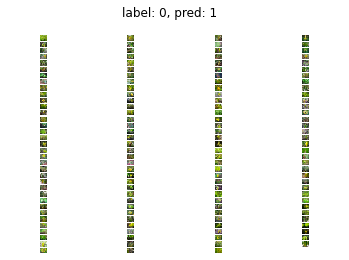

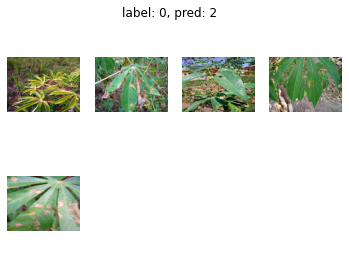

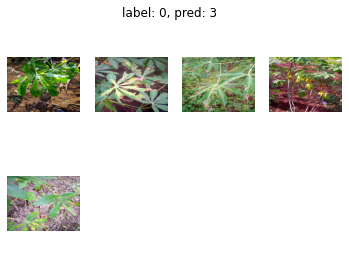

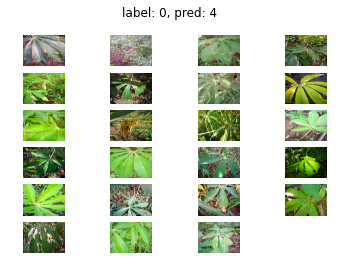

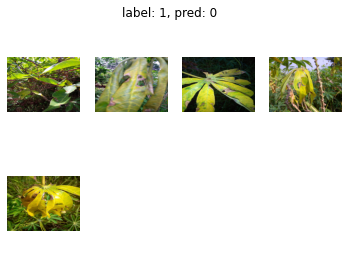

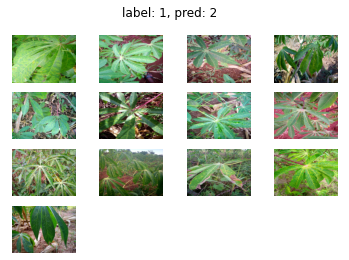

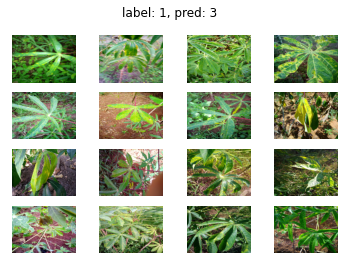

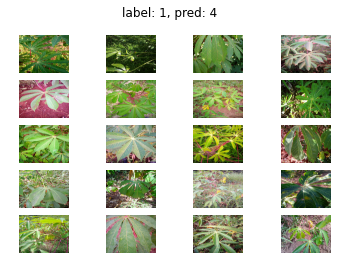

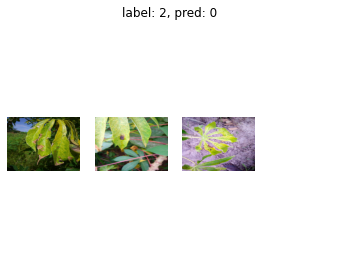

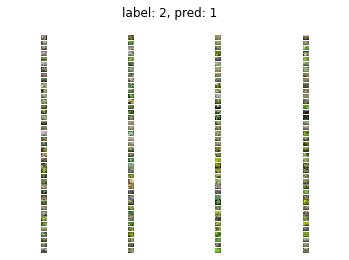

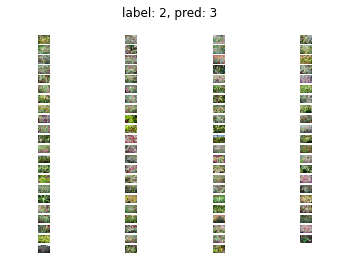

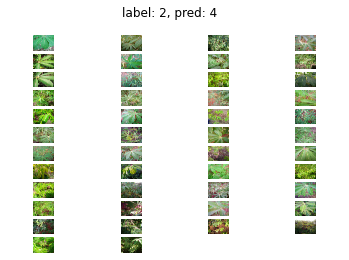

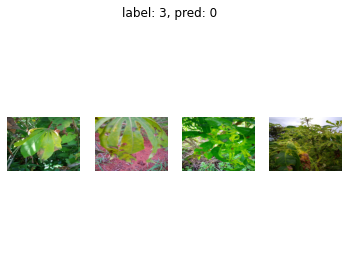

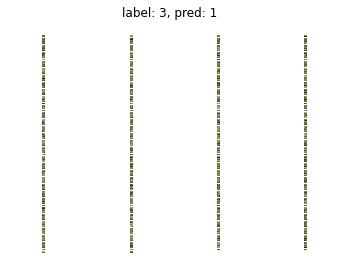

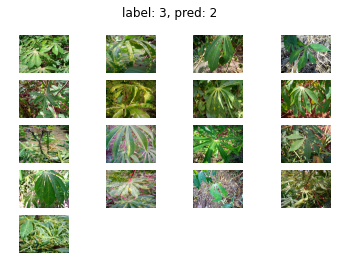

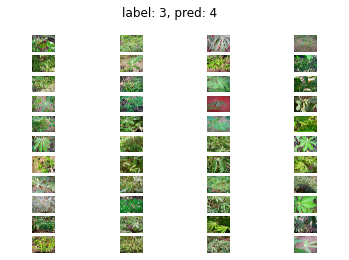

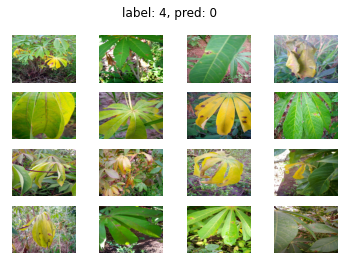

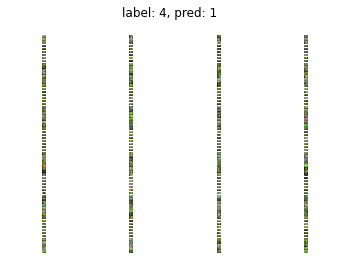

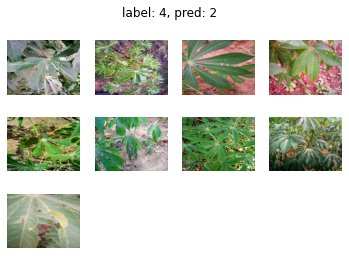

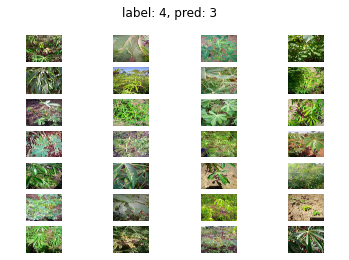

In [21]:
from haven import haven_utils as hu
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

datadir_base = '/home/xhdeng/scratch/datasets/cassava'
savedir_base = '/home/xhdeng/scratch/results/debug/cassava_debug'
df = pd.read_csv(os.path.join(savedir_base, 'false_positive.csv'))

for label in range(5):
    for pred in range(5):
        if label == pred: 
            continue
        group = df.loc[(df['label'] == ('tensor(%s)' % label)) & (df[' pred'] == (' tensor(%s)' % pred)), [' fname']]
        fig = plt.figure()
        fig.suptitle("label: %s, pred: %s" % (label, pred))
        plt.axis('off')
        for index, fname in enumerate(group.values):
            img = mpimg.imread(os.path.join(datadir_base, 'train_images', fname[0].strip()))
            fig.add_subplot(math.ceil(group.size / 4), 4, index + 1)
            plt.imshow(img)
            plt.axis('off')

In [1]:
from haven import haven_utils as hu
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np

datadir_base = '/home/xhdeng/scratch/datasets/cassava'
savedir_base = '/home/xhdeng/scratch/results/debug/cassava_debug'


def get_confussion_matrix(fname):
    df = pd.read_csv(os.path.join(savedir_base, fname))
    labels = ['label%s' % l for l in range(5)]
    preds = ['pred%s' % p for p in range(5)]
    output = pd.DataFrame(index=labels, columns=preds+ ['correct/total'])
    for label in range(5):
        for pred in range(5):
            size = df.loc[(df['label'] == ('tensor(%s)' % label)) & (df[' pred'] == (' tensor(%s)' % pred))].size
            output[preds[pred]][labels[label]] = size
        current_row = np.asarray(output.loc[labels[label]])[:-1]
        output['correct/total'][labels[label]] = current_row[label] / np.sum(current_row)

    print(output)

print('========== resnext with data augmentation ==========')
get_confussion_matrix('val_result.csv')

print('========== without data augmentation ==========')
get_confussion_matrix('ea04aa8bdf4d9306464f8db5d06505d4val_result.csv')

========== resnext with data augmentation ==========
       pred0 pred1 pred2 pred3 pred4 correct/total
label0   123   453    12    15    48       0.18894
label1    18  1167    30    48    51      0.888128
label2     9   516   507   261   138      0.354298
label3     9  1125    51  6570   141      0.832067
label4    36   891    30    96   495      0.319767
========== without data augmentation ==========
       pred0 pred1 pred2 pred3 pred4 correct/total
label0   243    45     9    30   114       0.55102
label1    42   477    39   105   123       0.60687
label2    21    15   546   180   147       0.60066
label3    12    21    33  4785    96      0.967253
label4    84    54    24    90   705      0.736677
